#(1)

Eric 19.586199378586844
Nico 32.60667661083755
Sanne 0.0044727258858547145


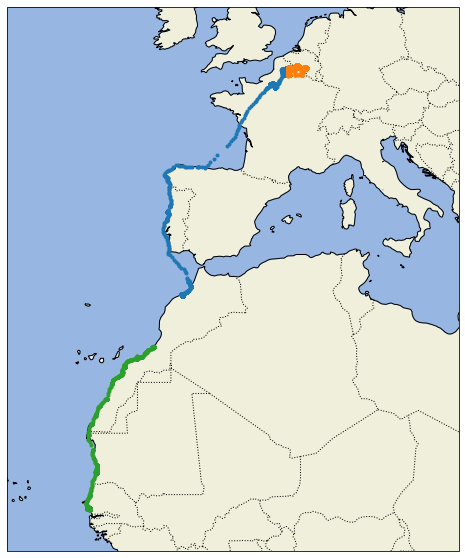

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()
plt.figure(figsize=(10, 10))

ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':');

def euc(a,b):
    return distance.euclidean(a, b)

birdata = pd.read_csv('bird_tracking.csv')
bird_names = pd.unique(birdata.bird_name)

sindex = 2500;
eindex = 7500;

ix = birdata['bird_name'] == 'Eric'
x, y = birdata.longitude[ix], birdata.latitude[ix]

i = [x[sindex], y[sindex]]
j = [x[eindex], y[eindex]]

ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Eric', euc(i, j))

ix = birdata['bird_name'] == 'Nico'
x, y = birdata.longitude[ix], birdata.latitude[ix]

start = len(x)
dest = len(y)

i = [x[start + sindex], y[start + sindex]]
j = [x[dest + eindex], y[dest + eindex]]

ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Nico', euc(i, j))

ix = birdata['bird_name'] == 'Sanne'
x, y = birdata.longitude[ix], birdata.latitude[ix]

start = start + len(x)
dest = dest + len(y)

i = [x[start + sindex], y[start + sindex]]
j = [x[dest + eindex], y[dest + eindex]]

ax.plot(x[sindex:eindex], y[sindex:eindex], '.', transform=ccrs.Geodetic());
print('Sanne', euc(i, j))

#(2) 13.26

In [11]:
import pandas as pd

longest = 0
distlist = []

bird_names = pd.unique(birdata.bird_name)
bird_dist = {}

def euc(a,b):
    return distance.euclidean(a, b)
start = 0
end = 0
count = 0

for bird_name in bird_names:
    ix = birdata['bird_name'] == bird_name
    x, y = birdata.longitude[ix], birdata.latitude[ix]
    longest = 0
    i = [x[start], y[start]]
    for ind in range(len(x)-1):
        j = [x[start+ind+1], y[start+ind+1]]
        newlength = euc(i, j)
        distlist.append(newlength)
        if(euc(i, j) > longest):
            longest = newlength
    bird_dist[bird_names[count]] = longest
    count = count + 1
    start = start + len(x)
    dest = dest + len(x)
x = pd.Series(bird_dist)
x

Eric     22.599113
Nico     43.449202
Sanne    40.871441
dtype: float64

#(3) 13.27

In [48]:
# 40000km라고 가정해서 새의 이동 거리 km 단위로 환산해서 저장
bird_distkm = {}

start = 0
end = 0
count = 0

for bird_name in bird_names:
    ix = birdata['bird_name'] == bird_name
    x, y = birdata.longitude[ix], birdata.latitude[ix]
    longest = 0
    
    i = [x[start], y[start]]
    
    for ind in range(len(x)-1):
        j = [x[start+ind+1], y[start+ind+1]]
        newlength = euc(i, j)
        distlist.append(newlength)
        
        if(euc(i, j) > longest):
            longest = newlength
            bird_distkm[bird_name] = longest * (40000 / 360)
            
    bird_dist[bird_names[count]] = bird_distkm
    count = count + 1
    start = start + len(x)
    dest = dest + len(x)

bird_distkm

{'Eric': 2511.012525041367,
 'Nico': 4827.689090091932,
 'Sanne': 4541.271186064482}